# Setup

In [1]:
#Python≥3.5 is required
import sys
assert sys.version_info>=(3,5)

#Scikit-Learn≥0.20 is required
import sklearn
assert sklearn.__version__>="0.20"

#异常信息的获取对于程序的调试非常重要，可以有助于快速定位有错误程序语句的位置
try: 
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x 
except Exception: # Exception可以代指程序可能发生的所有异常情况，其通常用在最后一个 except 块
    pass 

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 感知器

In [2]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int) #判断是否是0类，若是则为1，不是则为0

per_clf=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)

y_pred=per_clf.predict([[2,0.5]])

C:\Users\MSI-NB\AppData\Local\Temp/ipykernel_23368/1750551226.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris.target==0).astype(np.int) #判断是否是0类，若是则为1，不是则为0


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


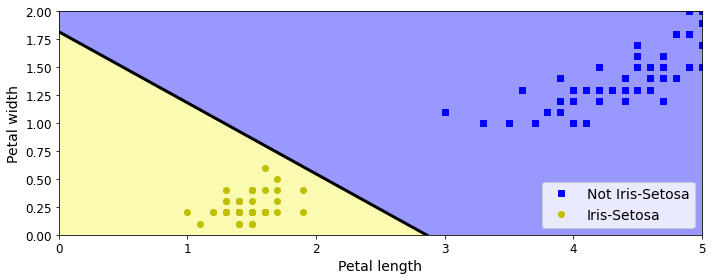

In [4]:
#画出决策边界
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 激活函数

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001): #派生
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


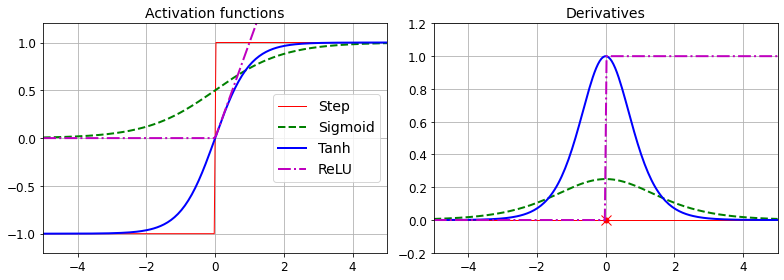

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step") #sign取数字符号（数字前的正负号）的函数，即正负,得到结果只有1或-1
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True) # 显示网格线 1=True=默认显示；0=False=不显示
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):  #判断是否大于0，若是则为1，若不是则为0
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

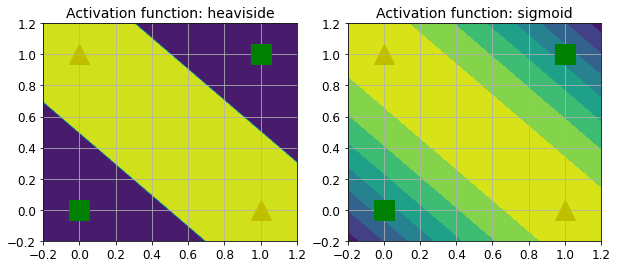

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# 建造一个图片分类器

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.3.0'

In [11]:
keras.__version__

'2.4.0'

In [12]:
#数据集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype #uint8：8位无符号整型

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

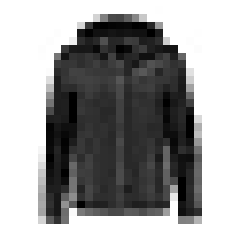

In [16]:
plt.imshow(X_train[0], cmap="binary") #二进制
plt.axis('off')
plt.show()

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


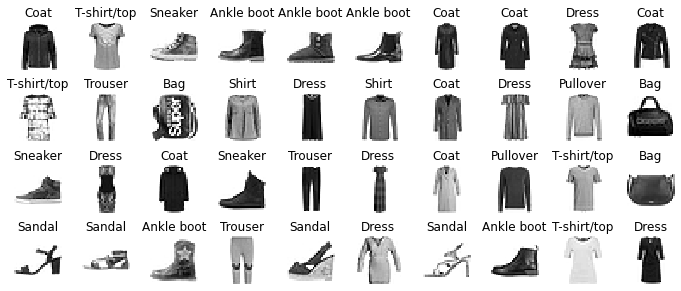

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential() #顺序API
model.add(keras.layers.Flatten(input_shape=[28, 28])) #将每个输入图像转换为一维度组，且这层为第一层，所以要规定输入图片的形状
model.add(keras.layers.Dense(300, activation="relu")) #添加具有300个神经元的隐藏层
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) #每个类一个

可以不用逐层添加层，而是创建顺序模型时传递一个层列表

In [24]:
keras.backend.clear_session() #销毁当前的TF图并创建一个新图，有助于避免旧模型/图层混乱。
np.random.seed(42)
tf.random.set_seed(42)

keras.backend.clear_session()很常见的场景就是当你在进行keras的交叉验证时，例如你用5折，对于fold_0,fold_1…一直到fold_4.都应该有一个独立的模型。所以在每折的开头都需要加上clear_session()。否则上一折的训练集成了这一折的验证集，数据泄露

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


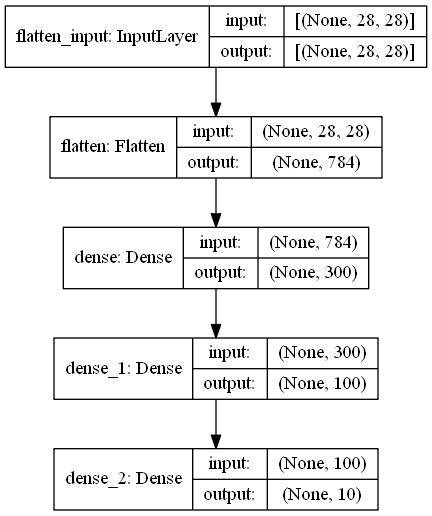

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1 

True

In [31]:
#得到初始化权重与偏值
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", #多分类，稀疏向量
              optimizer="sgd", #默认为0.01，不能直接调整
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 885us/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 1s 804us/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 1s 816us/step - loss: 0.4392 - accuracy: 0.8457 - val_loss: 0.5358 - val_accuracy: 0.7976
Epoch 4/30
1719/1719 [==============================] - 1s 823us/step - loss: 0.4126 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 1s 827us/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 1s 827us/step - loss: 0.3753 - accuracy: 0.8676 - val_loss: 0.3694 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 1s 833us/step - loss: 0.3633 - accuracy: 0.8711 - val_loss: 0.3616 -

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


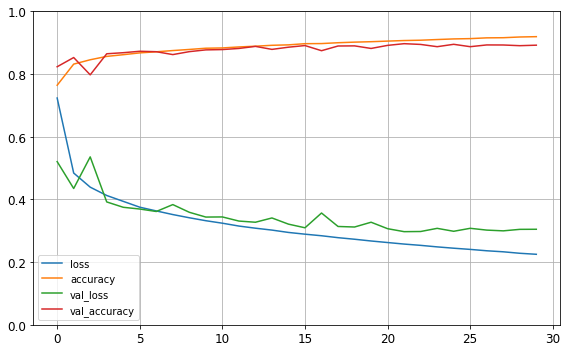

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，设定x轴的范围
save_fig("keras_learning_curves_plot")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 598us/step - loss: 0.3382 - accuracy: 0.8808


[0.3381699323654175, 0.8808000087738037]

使用模型进行预测，因没有新实例所以用测试集前3给个实例

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new) #给出每个实例中十类的可能性
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
#只关心最有可能被分成的类
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Saving figure fashion_mnist_images_plot


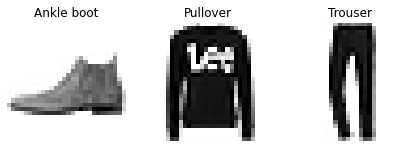

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# 使用顺序API构建回归MLP

使用加州住房数据集，这次的数据集更简单，仅包含数字特征，且没有缺失值

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 738us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 508us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 524us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 522us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 508us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 513us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 514us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 509us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 512us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 498us/step - loss: 0.487

In [50]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

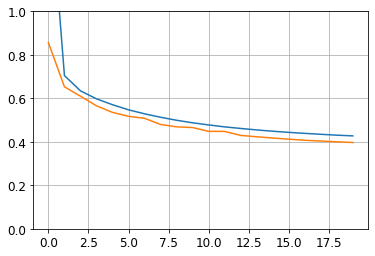

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 使用函数式API构建复杂模型

并不是所有的神经网络模型都是简单的顺序的。有些可能具有复杂的拓扑结构。有些可能有多个输入和/或多个输出。例如，Wide & Deep神经网络(见论文)将所有或部分输入直接连接到输出层。

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) #合并
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [54]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [55]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 723us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 549us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 540us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 562us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 538us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 532us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 530us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 534us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 551us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 532us/step - loss: 0.465

In [56]:
y_pred

array([[0.47010726],
       [1.8735044 ],
       [3.379823  ]], dtype=float32)

如果您想通过宽路径或深路径发送不同的输入特征子集，该怎么办?我们将发送5个特征(特征0到4)，6个特征通过深度路径(特征2到7)。注意，有3个特征将同时通过(特征2、3和4)。

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 784us/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 563us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 608us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 560us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 567us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 557us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 582us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 566us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 558us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 562us/step - loss: 0.464

添加辅助输出进行正则化

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
_______________________________________________________________________________________

In [63]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [64]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 978us/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 664us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 651us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 665us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 672us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 

In [65]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 468us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# 使用子类API构建动态模型

In [66]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): #用来建立输入参数的方法
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [67]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 650us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 651us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 648us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 640us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

# 保存和还原模型

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 723us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 531us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 519us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 539us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 522us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 526us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 519us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 524us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 553us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 369us/step - loss: 0.438

In [71]:
model.save("my_keras_model.h5")

In [72]:
model = keras.models.load_model("my_keras_model.h5") #加载训练好的模型

In [73]:
model.predict(X_new)

array([[0.5400237],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [74]:
model.save_weights("my_keras_weights.ckpt") #若是子类化则不能直接保存模型，只能保留它的权重

In [75]:
model.load_weights("my_keras_weights.ckpt") #加载权重

# 使用回调函数

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
#保存在验证集中正确率最高的模型
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) #定期保存模型的检查点
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model返回最好的模型
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 745us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 566us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 575us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 564us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 556us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 525us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 555us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 582us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 547us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 351us/step - loss: 0.438

In [79]:
#实现提前停止的另一种方法，保存在验证集中正确率最高的模型并在后面十个轮次在验证集上没有任何进展，就中断训练
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 778us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 528us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 573us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 564us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 566us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 560us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 552us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 555us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 555us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 558us/step - l

Epoch 80/100
363/363 [==============================] - 0s 533us/step - loss: 0.3329 - val_loss: 0.3354
Epoch 81/100
363/363 [==============================] - 0s 525us/step - loss: 0.3324 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 565us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 525us/step - loss: 0.3317 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 524us/step - loss: 0.3312 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 536us/step - loss: 0.3310 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 564us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 525us/step - loss: 0.3305 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 550us/step - loss: 0.3299 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 578us

In [80]:
#自定义回调，显示训练过程中验证损失与训练损失之间的比率检测过拟合
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/2
344/363 [===========================>..] - ETA: 0s - loss: 0.3279
val/train: 1.08
363/363 [==============================] - 0s 643us/step - loss: 0.3302 - val_loss: 0.3556
Epoch 2/2
243/363 [===================>..........] - ETA: 0s - loss: 0.3294
val/train: 1.00
363/363 [==============================] - 0s 540us/step - loss: 0.3301 - val_loss: 0.3304


# 使用TensorBoard进行可视化

In [82]:
root_logdir = os.path.join(os.curdir, "my_logs") #设置根日志目录，curdir获取当前执行python文件的文件夹

In [83]:
os.curdir

'.'

In [84]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") #返回以可读字符串表示的当地时间
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_04_08-03_58_19'

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [87]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 844us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 560us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 545us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 557us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 535us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 555us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [===

要启动TensorBoard服务器，可以加载TensorBoard的jupyter扩展，然后像这样运行它:

In [144]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18748), started 3:22:56 ago. (Use '!kill 18748' to kill it.)

In [89]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_04_08-03_58_25'

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [92]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 595us/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 571us/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 539us/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 541us/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 532us/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 588us/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 532us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 529us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 543us/step - lo

# 微调神经网络超参数

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

将Keras模型包装在模仿常规Scikit-Learn回归器的对象中

In [94]:
#创建一个函数，将在给一组超参数的情况下构建并编译Keras模型
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [95]:
#基于build_model()函数创建一个KerasRegressor，KerasRegressor对象是使用build_mode()构建的Keras模型的一个包装
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [96]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 703us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 495us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 505us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 511us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 509us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 501us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 499us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 503us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 499us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 502us/step - 

Epoch 80/100
363/363 [==============================] - 0s 494us/step - loss: 0.3376 - val_loss: 0.3595
Epoch 81/100
363/363 [==============================] - 0s 501us/step - loss: 0.3383 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 0s 495us/step - loss: 0.3371 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 0s 496us/step - loss: 0.3367 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 0s 516us/step - loss: 0.3362 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 0s 508us/step - loss: 0.3369 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 0s 495us/step - loss: 0.3359 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 0s 500us/step - loss: 0.3357 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 0s 493us/step - loss: 0.3355 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 0s 496us

In [97]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 357us/step - loss: 0.3409


In [98]:
y_pred = keras_reg.predict(X_new)

In [99]:
y_pred

array([0.58884525, 1.5484407 , 4.1112185 ], dtype=float32)

In [100]:
#训练数百个关于超参数的变体，查看哪种变体在验证集上表现最佳
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(), #数组转列表
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),#在reciprocal分布上随机抽样1000次
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 849us/step - loss: 0.7861 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 0s 576us/step - loss: 0.4791 - val_loss: 0.4998
Epoch 3/100
242/242 [==============================] - 0s 559us/step - loss: 0.4595 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 0s 561us/step - loss: 0.4497 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 0s 551us/step - loss: 0.4455 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 0s 573us/step - loss: 0.4427 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 0s 598us/step - loss: 0.4468 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 0s 581us/step - loss: 0.4394 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 0s 581us/step - loss: 0.4631 - val_loss: 0.4199
Epoch 10/100

242/242 [==============================] - 0s 576us/step - loss: 0.3871 - val_loss: 0.3621
Epoch 25/100
242/242 [==============================] - 0s 548us/step - loss: 0.3902 - val_loss: 0.3609
Epoch 26/100
242/242 [==============================] - 0s 560us/step - loss: 0.3903 - val_loss: 0.3605
Epoch 27/100
242/242 [==============================] - 0s 559us/step - loss: 0.3886 - val_loss: 0.3618
Epoch 28/100
242/242 [==============================] - 0s 565us/step - loss: 0.3863 - val_loss: 0.3622
Epoch 29/100
242/242 [==============================] - 0s 564us/step - loss: 0.4029 - val_loss: 0.3574
Epoch 30/100
242/242 [==============================] - 0s 573us/step - loss: 0.3858 - val_loss: 0.3561
Epoch 31/100
242/242 [==============================] - 0s 569us/step - loss: 0.3844 - val_loss: 0.3645
Epoch 32/100
242/242 [==============================] - 0s 546us/step - loss: 0.3900 - val_loss: 0.3552
Epoch 33/100
242/242 [==============================] - 0s 557us/step - loss:

242/242 [==============================] - 0s 635us/step - loss: 0.5470 - val_loss: 2.4708
Epoch 4/100
242/242 [==============================] - 0s 634us/step - loss: 0.4562 - val_loss: 4.1857
Epoch 5/100
242/242 [==============================] - 0s 631us/step - loss: 0.4401 - val_loss: 1.1614
Epoch 6/100
242/242 [==============================] - 0s 655us/step - loss: 0.4064 - val_loss: 0.3633
Epoch 7/100
242/242 [==============================] - 0s 626us/step - loss: 0.3857 - val_loss: 0.3785
Epoch 8/100
242/242 [==============================] - 0s 626us/step - loss: 0.3781 - val_loss: 0.3907
Epoch 9/100
242/242 [==============================] - 0s 657us/step - loss: 0.3717 - val_loss: 0.4213
Epoch 10/100
242/242 [==============================] - 0s 659us/step - loss: 0.3706 - val_loss: 0.3678
Epoch 11/100
242/242 [==============================] - 0s 647us/step - loss: 0.3647 - val_loss: 0.4243
Epoch 12/100
242/242 [==============================] - 0s 643us/step - loss: 0.360

242/242 [==============================] - 0s 564us/step - loss: 0.6595 - val_loss: 0.6335
Epoch 14/100
242/242 [==============================] - 0s 566us/step - loss: 0.6500 - val_loss: 0.6260
Epoch 15/100
242/242 [==============================] - 0s 560us/step - loss: 0.6411 - val_loss: 0.6160
Epoch 16/100
242/242 [==============================] - 0s 589us/step - loss: 0.6326 - val_loss: 0.6094
Epoch 17/100
242/242 [==============================] - 0s 573us/step - loss: 0.6245 - val_loss: 0.6016
Epoch 18/100
242/242 [==============================] - 0s 565us/step - loss: 0.6167 - val_loss: 0.5956
Epoch 19/100
242/242 [==============================] - 0s 560us/step - loss: 0.6093 - val_loss: 0.5883
Epoch 20/100
242/242 [==============================] - 0s 581us/step - loss: 0.6022 - val_loss: 0.5825
Epoch 21/100
242/242 [==============================] - 0s 573us/step - loss: 0.5954 - val_loss: 0.5726
Epoch 22/100
242/242 [==============================] - 0s 573us/step - loss:

Epoch 92/100
242/242 [==============================] - 0s 688us/step - loss: 0.4227 - val_loss: 0.4006
Epoch 93/100
242/242 [==============================] - 0s 558us/step - loss: 0.4219 - val_loss: 0.4004
Epoch 94/100
242/242 [==============================] - 0s 570us/step - loss: 0.4212 - val_loss: 0.3997
Epoch 95/100
242/242 [==============================] - 0s 563us/step - loss: 0.4205 - val_loss: 0.3992
Epoch 96/100
242/242 [==============================] - 0s 560us/step - loss: 0.4197 - val_loss: 0.3988
Epoch 97/100
242/242 [==============================] - 0s 577us/step - loss: 0.4190 - val_loss: 0.3979
Epoch 98/100
242/242 [==============================] - 0s 548us/step - loss: 0.4183 - val_loss: 0.3968
Epoch 99/100
242/242 [==============================] - 0s 563us/step - loss: 0.4176 - val_loss: 0.3983
Epoch 100/100
121/121 [==============================] - 0s 338us/step - loss: 0.4252
[CV] END learning_rate=0.00037078874137762145, n_hidden=1, n_neurons=51; total tim

242/242 [==============================] - 0s 600us/step - loss: 0.5431 - val_loss: 0.5243
Epoch 30/100
242/242 [==============================] - 0s 575us/step - loss: 0.5387 - val_loss: 0.5186
Epoch 31/100
242/242 [==============================] - 0s 559us/step - loss: 0.5344 - val_loss: 0.5167
Epoch 32/100
242/242 [==============================] - 0s 581us/step - loss: 0.5303 - val_loss: 0.5124
Epoch 33/100
242/242 [==============================] - 0s 635us/step - loss: 0.5263 - val_loss: 0.5091
Epoch 34/100
242/242 [==============================] - 0s 569us/step - loss: 0.5226 - val_loss: 0.5040
Epoch 35/100
242/242 [==============================] - 0s 573us/step - loss: 0.5189 - val_loss: 0.5025
Epoch 36/100
242/242 [==============================] - 0s 572us/step - loss: 0.5154 - val_loss: 0.4915
Epoch 37/100
242/242 [==============================] - 0s 559us/step - loss: 0.5120 - val_loss: 0.4859
Epoch 38/100
242/242 [==============================] - 0s 567us/step - loss:

242/242 [==============================] - 0s 621us/step - loss: 0.4754 - val_loss: 0.4689
Epoch 7/100
242/242 [==============================] - 0s 614us/step - loss: 0.4536 - val_loss: 0.4310
Epoch 8/100
242/242 [==============================] - 0s 706us/step - loss: 0.4366 - val_loss: 0.4383
Epoch 9/100
242/242 [==============================] - 0s 604us/step - loss: 0.4242 - val_loss: 0.4248
Epoch 10/100
242/242 [==============================] - 0s 625us/step - loss: 0.4143 - val_loss: 0.4375
Epoch 11/100
242/242 [==============================] - 0s 647us/step - loss: 0.4067 - val_loss: 0.3995
Epoch 12/100
242/242 [==============================] - 0s 631us/step - loss: 0.3999 - val_loss: 0.3947
Epoch 13/100
242/242 [==============================] - 0s 626us/step - loss: 0.3942 - val_loss: 0.4215
Epoch 14/100
242/242 [==============================] - 0s 655us/step - loss: 0.3897 - val_loss: 0.4458
Epoch 15/100
242/242 [==============================] - 0s 619us/step - loss: 0.

242/242 [==============================] - 0s 614us/step - loss: 0.3509 - val_loss: 0.3321
Epoch 44/100
242/242 [==============================] - 0s 606us/step - loss: 0.3501 - val_loss: 0.3779
Epoch 45/100
242/242 [==============================] - 0s 615us/step - loss: 0.3495 - val_loss: 0.3431
Epoch 46/100
242/242 [==============================] - 0s 622us/step - loss: 0.3482 - val_loss: 0.3652
Epoch 47/100
242/242 [==============================] - 0s 639us/step - loss: 0.3472 - val_loss: 0.3298
Epoch 48/100
242/242 [==============================] - 0s 642us/step - loss: 0.3468 - val_loss: 0.3285
Epoch 49/100
242/242 [==============================] - 0s 703us/step - loss: 0.3451 - val_loss: 0.4189
Epoch 50/100
242/242 [==============================] - 0s 633us/step - loss: 0.3456 - val_loss: 0.3430
Epoch 51/100
242/242 [==============================] - 0s 658us/step - loss: 0.3438 - val_loss: 0.3874
Epoch 52/100
242/242 [==============================] - 0s 618us/step - loss:

242/242 [==============================] - 0s 549us/step - loss: 11.2886 - val_loss: 95.7204
Epoch 12/100
242/242 [==============================] - 0s 635us/step - loss: 0.6338 - val_loss: 0.4980
Epoch 13/100
242/242 [==============================] - 0s 593us/step - loss: 0.7299 - val_loss: 728.3749
Epoch 14/100
242/242 [==============================] - 0s 572us/step - loss: 8.4135 - val_loss: 426.6043
Epoch 15/100
242/242 [==============================] - 0s 614us/step - loss: 2.1307 - val_loss: 1014.9502
Epoch 16/100
242/242 [==============================] - 0s 606us/step - loss: 35.2207 - val_loss: 820.1586
Epoch 17/100
242/242 [==============================] - 0s 622us/step - loss: 8.6242 - val_loss: 1080.5731
Epoch 18/100
242/242 [==============================] - 0s 572us/step - loss: 3.6469 - val_loss: 471.8726
Epoch 19/100
242/242 [==============================] - 0s 596us/step - loss: 23.5580 - val_loss: 290.1389
Epoch 20/100
242/242 [==============================] - 0

242/242 [==============================] - 0s 1ms/step - loss: 1.3901 - val_loss: 1.0742
Epoch 2/100
242/242 [==============================] - 0s 626us/step - loss: 0.5807 - val_loss: 1.5461
Epoch 3/100
242/242 [==============================] - 0s 626us/step - loss: 0.5096 - val_loss: 2.1300
Epoch 4/100
242/242 [==============================] - 0s 639us/step - loss: 0.4760 - val_loss: 0.5628
Epoch 5/100
242/242 [==============================] - 0s 639us/step - loss: 0.4291 - val_loss: 0.5440
Epoch 6/100
242/242 [==============================] - 0s 616us/step - loss: 0.4107 - val_loss: 0.3782
Epoch 7/100
242/242 [==============================] - 0s 644us/step - loss: 0.3975 - val_loss: 0.3642
Epoch 8/100
242/242 [==============================] - 0s 610us/step - loss: 0.3880 - val_loss: 0.3605
Epoch 9/100
242/242 [==============================] - 0s 612us/step - loss: 0.3796 - val_loss: 0.3808
Epoch 10/100
242/242 [==============================] - 0s 614us/step - loss: 0.3749 - 

Epoch 7/100
242/242 [==============================] - 0s 585us/step - loss: 0.5148 - val_loss: 0.4787
Epoch 8/100
242/242 [==============================] - 0s 593us/step - loss: 0.4935 - val_loss: 0.5109
Epoch 9/100
242/242 [==============================] - 0s 573us/step - loss: 0.4784 - val_loss: 0.4881
Epoch 10/100
242/242 [==============================] - 0s 579us/step - loss: 0.4634 - val_loss: 0.4455
Epoch 11/100
242/242 [==============================] - 0s 577us/step - loss: 0.4516 - val_loss: 0.4218
Epoch 12/100
242/242 [==============================] - 0s 585us/step - loss: 0.4424 - val_loss: 0.4376
Epoch 13/100
242/242 [==============================] - 0s 573us/step - loss: 0.4346 - val_loss: 0.4147
Epoch 14/100
242/242 [==============================] - 0s 581us/step - loss: 0.4289 - val_loss: 0.4338
Epoch 15/100
242/242 [==============================] - 0s 564us/step - loss: 0.4237 - val_loss: 0.4053
Epoch 16/100
242/242 [==============================] - 0s 556us/st

242/242 [==============================] - 0s 667us/step - loss: 0.2788 - val_loss: 0.3014
Epoch 50/100
242/242 [==============================] - 0s 676us/step - loss: 0.2793 - val_loss: 0.3174
Epoch 51/100
242/242 [==============================] - 0s 669us/step - loss: 0.2769 - val_loss: 0.3224
Epoch 52/100
242/242 [==============================] - 0s 668us/step - loss: 0.2749 - val_loss: 0.3482
Epoch 53/100
242/242 [==============================] - 0s 675us/step - loss: 0.2765 - val_loss: 0.2827
Epoch 54/100
242/242 [==============================] - 0s 674us/step - loss: 0.2743 - val_loss: 0.3406
Epoch 55/100
242/242 [==============================] - 0s 674us/step - loss: 0.2744 - val_loss: 0.3703
Epoch 56/100
242/242 [==============================] - 0s 668us/step - loss: 0.2744 - val_loss: 0.3102
Epoch 57/100
242/242 [==============================] - 0s 659us/step - loss: 0.2721 - val_loss: 0.3263
Epoch 58/100
242/242 [==============================] - 0s 687us/step - loss:

242/242 [==============================] - 0s 669us/step - loss: 0.2970 - val_loss: 0.3369
Epoch 28/100
242/242 [==============================] - 0s 662us/step - loss: 0.2981 - val_loss: 0.3476
Epoch 29/100
242/242 [==============================] - 0s 670us/step - loss: 0.2945 - val_loss: 0.3279
Epoch 30/100
242/242 [==============================] - 0s 651us/step - loss: 0.2910 - val_loss: 0.2942
Epoch 31/100
242/242 [==============================] - 0s 672us/step - loss: 0.2905 - val_loss: 0.3134
Epoch 32/100
242/242 [==============================] - 0s 672us/step - loss: 0.2892 - val_loss: 0.2860
Epoch 33/100
242/242 [==============================] - 0s 658us/step - loss: 0.2872 - val_loss: 0.3234
Epoch 34/100
242/242 [==============================] - 0s 692us/step - loss: 0.2849 - val_loss: 0.3296
Epoch 35/100
242/242 [==============================] - 0s 672us/step - loss: 0.2850 - val_loss: 0.2978
Epoch 36/100
242/242 [==============================] - 0s 664us/step - loss:

Epoch 9/100
242/242 [==============================] - 0s 676us/step - loss: 0.3506 - val_loss: 0.4343
Epoch 10/100
242/242 [==============================] - 0s 672us/step - loss: 0.3492 - val_loss: 0.3983
Epoch 11/100
242/242 [==============================] - 0s 659us/step - loss: 0.3442 - val_loss: 0.5213
Epoch 12/100
242/242 [==============================] - 0s 676us/step - loss: 0.3419 - val_loss: 0.3242
Epoch 13/100
242/242 [==============================] - 0s 651us/step - loss: 0.3362 - val_loss: 0.3350
Epoch 14/100
242/242 [==============================] - 0s 664us/step - loss: 0.3318 - val_loss: 0.4545
Epoch 15/100
242/242 [==============================] - 0s 672us/step - loss: 0.3313 - val_loss: 0.3398
Epoch 16/100
242/242 [==============================] - 0s 668us/step - loss: 0.3268 - val_loss: 0.4335
Epoch 17/100
242/242 [==============================] - 0s 664us/step - loss: 0.3238 - val_loss: 0.3261
Epoch 18/100
242/242 [==============================] - 0s 676us/

242/242 [==============================] - 0s 626us/step - loss: 0.3889 - val_loss: 0.3949
Epoch 9/100
242/242 [==============================] - 0s 604us/step - loss: 0.3817 - val_loss: 0.4589
Epoch 10/100
242/242 [==============================] - 0s 635us/step - loss: 0.3795 - val_loss: 0.3501
Epoch 11/100
242/242 [==============================] - 0s 610us/step - loss: 0.3726 - val_loss: 0.4816
Epoch 12/100
242/242 [==============================] - 0s 631us/step - loss: 0.3702 - val_loss: 0.3621
Epoch 13/100
242/242 [==============================] - 0s 642us/step - loss: 0.3666 - val_loss: 0.3631
Epoch 14/100
242/242 [==============================] - 0s 616us/step - loss: 0.3628 - val_loss: 0.4434
Epoch 15/100
242/242 [==============================] - 0s 631us/step - loss: 0.3611 - val_loss: 0.3449
Epoch 16/100
242/242 [==============================] - 0s 607us/step - loss: 0.3569 - val_loss: 0.4093
Epoch 17/100
242/242 [==============================] - 0s 633us/step - loss: 

363/363 [==============================] - 0s 591us/step - loss: 0.2836 - val_loss: 0.2813
Epoch 37/100
363/363 [==============================] - 0s 596us/step - loss: 0.2818 - val_loss: 0.3391
Epoch 38/100
363/363 [==============================] - 0s 598us/step - loss: 0.2792 - val_loss: 0.2929
Epoch 39/100
363/363 [==============================] - 0s 590us/step - loss: 0.2807 - val_loss: 0.2840
Epoch 40/100
363/363 [==============================] - 0s 589us/step - loss: 0.2789 - val_loss: 0.2918
Epoch 41/100
363/363 [==============================] - 0s 590us/step - loss: 0.2792 - val_loss: 0.4427
Epoch 42/100
363/363 [==============================] - 0s 598us/step - loss: 0.2814 - val_loss: 0.2767
Epoch 43/100
363/363 [==============================] - 0s 582us/step - loss: 0.2749 - val_loss: 0.3597
Epoch 44/100
363/363 [==============================] - 0s 591us/step - loss: 0.2754 - val_loss: 0.3099
Epoch 45/100
363/363 [==============================] - 0s 592us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002C9219935E0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

In [101]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [102]:
rnd_search_cv.best_score_

-0.31715184450149536

In [103]:
rnd_search_cv.best_estimator_

In [104]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 400us/step - loss: 0.2841


-0.2841307818889618

In [105]:
model = rnd_search_cv.best_estimator_.model
model

In [106]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 379us/step - loss: 0.2841


0.2841307818889618

# 练习题

In [107]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [108]:
X_train_full.shape

(60000, 28, 28)

In [109]:
X_train_full.dtype

dtype('uint8')

In [110]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

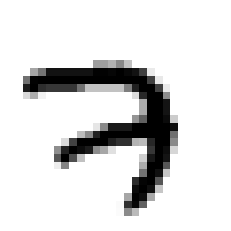

In [111]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [112]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [113]:
X_valid.shape

(5000, 28, 28)

In [114]:
X_test.shape

(10000, 28, 28)

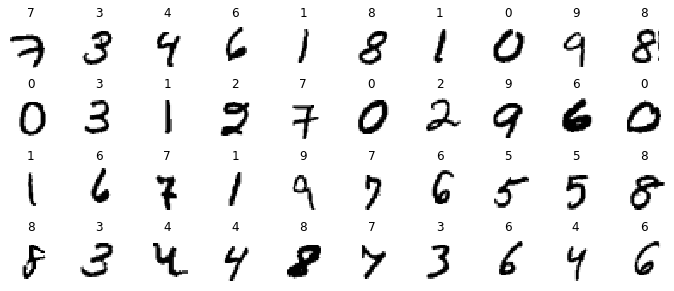

In [115]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

深度学习层级由大到小为：Model>layer>函数，方法形成layer层，layer层形成model，keras.backend即后端，其实就是将深度学习向比layer更小的方法即函数下沉，更能实现灵活性；这里的方法即函数层，其实就是一些基本的数值处理方法，例如求均值的mean、求最大值的max，求点积的dot等，这些方法组合就可以形成一个layer,loss等基本的层。

In [116]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [117]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [119]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [120]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5657 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

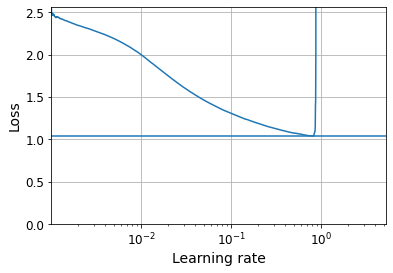

In [121]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates)) #用于在图形中的每个y处从xmin到xmax绘制水平线
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [124]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [125]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [126]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2362 - accuracy: 0.9266 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0946 - accuracy: 0.9703 - val_loss: 0.0926 - val_accuracy: 0.9730
Epoch 3/100
1719/1719 [==============================] - 2s 957us/step - loss: 0.0667 - accuracy: 0.9785 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 4/100
1719/1719 [==============================] - 2s 955us/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0760 - val_accuracy: 0.9786
Epoch 5/100
1719/1719 [==============================] - 2s 958us/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0933 - val_accuracy: 0.9736
Epoch 6/100
1719/1719 [==============================] - 2s 954us/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0820 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 2s 981us/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.070

In [127]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 639us/step - loss: 0.0793 - accuracy: 0.0994


[0.07927846908569336, 0.09939999878406525]

In [143]:
%tensorboard --logdir=./my_mnist_logs --port=6006

Reusing TensorBoard on port 6006 (pid 11080), started 0:46:58 ago. (Use '!kill 11080' to kill it.)